# Explore Ames Data Set for outliners ! 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Function to create a random distribution of ages 
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):


    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

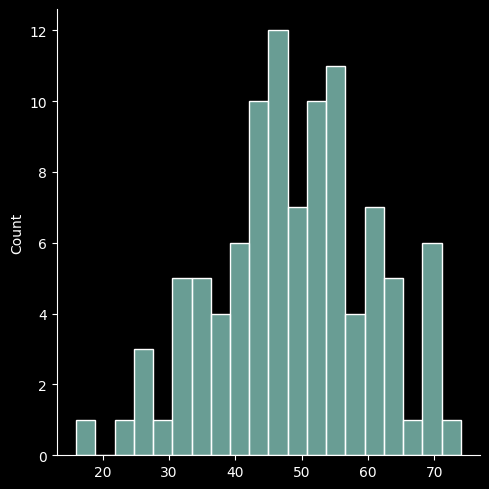

In [5]:
sns.displot(sample,bins=20)

<Axes: >

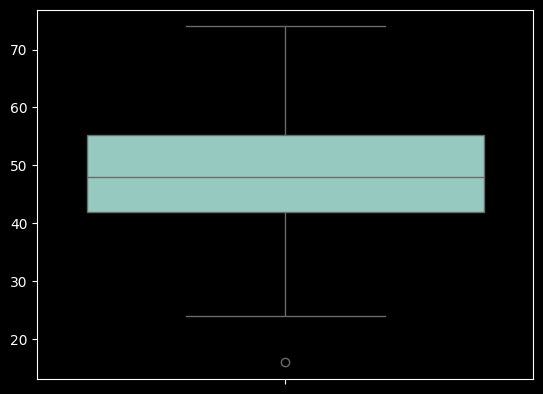

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

# What is IQR 
#### It is a measure of dispersion based on the lower and upper quartile . 

In [9]:
IQR = 55.25 - 42.0
lower_limit = 42.0 - 1.5*(IQR)

In [10]:
lower_limit

22.125

In [14]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [13]:
ser[ser < lower_limit]

74    16.0
dtype: float64

In [18]:
# Other way of this , using percentile functions of numpy 
q75, q25 = np.percentile(sample,[75,25])
iqr = q75 - q25

In [20]:
q25 - 1.5*iqr

22.125

In [23]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [24]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [26]:
df.corr()['SalePrice']

ValueError: could not convert string to float: 'RL'